In [29]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [2]:
# import mediapipe as mp
# mp_face_detection = mp.solutions.face_detection
# detector=mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5)
# def detect_face(frame):
#     bounding_boxes=[]
#     results = detector.process(frame)
#     if results.detections:
#         height,width,_=frame.shape
#         for detection in results.detections:
#             bb=detection.location_data.relative_bounding_box
#             x1=max(0,bb.xmin*width)
#             y1=max(0,bb.ymin*height)
#             x2=min(width,(bb.xmin+bb.width)*width)
#             y2=min(height,(bb.ymin+bb.height)*height)
#             bbox=np.array([x1,y1,x2,y2])
#             bounding_boxes.append(bbox)

#     return bounding_boxes

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [30]:
from mtcnn import MTCNN
import cv2

def detect_face(frame):
    bounding_boxes = []
    detector = MTCNN()
    
    results = detector.detect_faces(frame)
    if results:
        for result in results:
            x, y, width, height = result['box']
            x1, y1, x2, y2 = x, y, x + width, y + height
            bounding_boxes.append([x1, y1, x2, y2])
    
    return bounding_boxes

In [31]:
from hsemotion_onnx.facial_emotions import HSEmotionRecognizer
#model_name='enet_b0_8_best_afew'
model_name='enet_b0_8_best_vgaf'
#model_name='enet_b0_8_va_mtl'
#model_name='enet_b2_8'

fer=HSEmotionRecognizer(model_name=model_name)

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

1/1 [==============================] - 1s 717ms/step


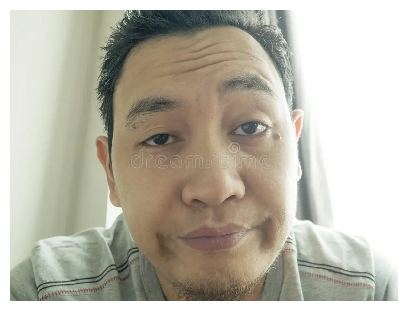

In [32]:
fpath='/Users/lalekosucuozgen/Desktop/DKE-academic contents/year3/project 3.1/hsemotion-onnx/demo/test5.png'
frame_bgr = cv2.imread(fpath)
plt.figure(figsize=(5, 5))
frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(frame)

bounding_boxes=detect_face(frame)

Contempt [-1.6920521  2.6895564 -0.4759546 -3.5583344  2.4096894  1.5690829
  0.6380635  1.3487922]


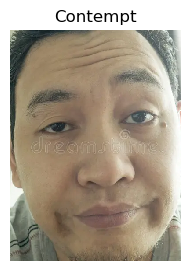

In [37]:
for bbox in bounding_boxes:
    # box = bbox.astype(int)
    x1,y1,x2,y2=bbox[0:4]    
    face_img=frame[y1:y2,x1:x2,:]
    emotion,scores=fer.predict_emotions(face_img,logits=True)
    print(emotion,scores)
    
    plt.figure(figsize=(3, 3))
    plt.axis('off')
    plt.imshow(face_img)
    plt.title(emotion)

8 basic expressions (Anger, Contempt, Disgust, Fear, Happiness, Neutral, Sadness, Surprise).

['Contempt'] [[0.00494506 0.39543974 0.01668462 0.00076499 0.29890668 0.12896292
  0.05083095 0.10346509]]


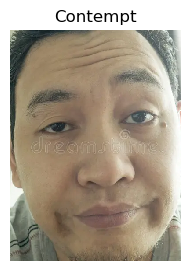

In [38]:
face_img_list=[]
for bbox in bounding_boxes:
    # box = bbox.astype(int)
    x1,y1,x2,y2=bbox[0:4]    
    face_img=frame[y1:y2,x1:x2,:]
    face_img_list.append(face_img)

emotions,scores=fer.predict_multi_emotions(face_img_list,logits=False)
print(emotions,scores)

for face_img,emotion in zip(face_img_list,emotions):    
    plt.figure(figsize=(3, 3))
    plt.axis('off')
    plt.imshow(face_img)
    plt.title(emotion)